# Instituto Politécnico Nacional
## Centro de Investigación en Cómputo
### Departamento de Diplomados y Extensión Profesional
Profesor: Alan Badillo Salas

Alumno: David Ruben Contreras Trejo

Mayo - Junio 2025. Ciudad de México.
## Proyecto Final - Redes Neuronales
## Predicción de Abandono de Pilotos de Fórmula 1


# **Introducción**

A lo largo del curso, he adquirido los conocimientos fundamentales sobre redes neuronales, sus estructuras, funciones de activación, tipos de pérdida y su aplicación práctica en problemas reales de clasificación y regresión. Gracias a esta formación, ahora soy capaz de construir y entrenar modelos de red neuronal con un enfoque técnico y analítico sólido.

En esta proyecto final, aplique lo aprendido para resolver un caso del mundo real: predecir si un piloto de Fórmula 1 abandonará la competencia, utilizando un conjunto de datos reales con métricas de desempeño como posición en la parrilla, mejoras de carrera y porcentaje de poles ganadas. El problema es de tipo clasificación binaria, por lo que se usó la función de activación sigmoid en la capa de salida y la pérdida BinaryCrossentropy.

Implemente tanto un modelo completo como uno simplificado, evalue su desempeño con precisión (accuracy), analice visualmente la influencia de cada variable y realice predicciones simuladas. Todo esto fue posible gracias al dominio de conceptos clave como capas densas, partición de datos, activaciones y entrenamiento supervisado.

## Paso 1 — Adquisición del conjunto de datos
**Código 74:** Cargar el conjunto de datos

In [ ]:
import pandas as pd

df = pd.read_csv("https://github.com/RookieWolf09/Cic_curdo1/raw/refs/heads/main/f1_churn_dataset_train.csv", sep=";")
df.head()

,idDriver,dtRef,dtLastSeen,dtFirstSeen,dtIntervalMaxMin,qtRaces,qtTeams,idTeam,qtLastSeenRace,avgGridPosition,...,avgGridPositionRaceLast40,medianGridPositionRaceLast40,avgPositionRaceLast40,medianPositionRaceLast40,totalPositionLiftRaceLast40,avgPositionLiftRaceLast40,medianPositionLiftRaceLast40,pctPolePosititionRaceLast40,pctPolewinRaceLast40,flChurn
0,albers,2007-08-05,2007-07-08,2005-03-06,854,46,4,spyker,2,18.282609,...,18.475,18.0,15.775,15.0,108,2.700,3.0,0.0,0.0,1
1,albers,2007-07-22,2007-07-08,2005-03-06,854,46,4,spyker,1,18.282609,...,18.475,18.0,15.775,15.0,108,2.700,3.0,0.0,0.0,1
2,albers,2007-07-08,2007-07-08,2005-03-06,854,46,4,spyker,0,18.282609,...,18.475,18.0,15.775,15.0,108,2.700,3.0,0.0,0.0,1
3,albers,2007-07-01,2007-07-01,2005-03-06,847,45,4,spyker,0,18.200000,...,18.275,18.0,15.750,15.0,101,2.525,3.0,0.0,0.0,1
4,albers,2007-06-17,2007-06-17,2005-03-06,833,44,4,spyker,0,18.159091,...,18.125,18.0,15.675,15.0,98,2.450,3.0,0.0,0.0,1


**Paso 1 — Adquisición del conjunto de datos**

**Preguntas:**

**¿Cuál debería ser la variable de respuesta?**

La variable de respuesta es flChurn, ya que indica si un piloto abandonó (1) o no (0).

**¿Es mejor predecir un valor continuo o binario?**

En este caso, binario. Queremos clasificar si abandonará o no.

**¿La red neuronal es mejor para clasificación o regresión?**

Es adecuada para ambas, pero este caso es de clasificación binaria, por lo que se ajusta perfectamente al uso de una red neuronal con sigmoid.

## Paso 2 — Construcción de variables de análisis
**Código 75:** Selección de variables

In [ ]:
x1 = df["avgGridPosition"]
x2 = df["avgPosition"]
x3 = df["avgPositionLift"]
x4 = df["pctPolePositition"]
x5 = df["pctPolewin"]
y  = df["flChurn"]

**Paso 2 — Construcción de las variables de análisis**

**Preguntas:**

**¿Crees que todas las variables pueden explicar si habrá abandono?**

No necesariamente todas, pero las variables seleccionadas (avgGridPosition, avgPosition, avgPositionLift, pctPolePositition, pctPolewin) están relacionadas directamente con el rendimiento, lo cual puede influir en el abandono.

**¿Cuál crees que es un buen porcentaje de aprendizaje en una red neuronal?**

Una precisión entre 75% y 90% es considerada buena para tareas de clasificación binaria. En este caso, obtuvimos 78.2%, lo cual es aceptable

## Paso 3 — Modelo completo de red neuronal

In [ ]:
import numpy as np

X = np.array([x1, x2, x3, x4, x5]).T
Y = y

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

In [ ]:
from keras import Sequential
from keras.layers import Input, Dense
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy

model = Sequential([
    Input(shape=(5,)),
    Dense(100, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 701 (2.74 KB)

 Trainable params: 701 (2.74 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, Y_train, batch_size=20, epochs=20)

Epoch 1/20
405/405 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7563 - loss: 0.5460
Epoch 2/20
405/405 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7981 - loss: 0.4794
Epoch 3/20
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7870 - loss: 0.4757
Epoch 4/20
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8008 - loss: 0.4584
Epoch 5/20
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8051 - loss: 0.4520
Epoch 6/20
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7918 - loss: 0.4687
Epoch 7/20
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7982 - loss: 0.4598
Epoch 8/20
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7976 - loss: 0.4558
Epoch 9/20
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8005 - loss: 0.4472
Epoch 10/20
405/405 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7862 - loss: 0.4595
Epoch 11/20
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7943 - loss: 0.4580
Epoch 12/20
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [ ]:
model.evaluate(X_test, Y_test)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7995 - loss: 0.4332


[0.4488423466682434, 0.7852548360824585]

**Paso 3 — Modelo de la Red Neuronal completa**

**Preguntas:**

**¿Por qué la capa de salida tiene un único nodo de tipo sigmoid?**

Porque flChurn es una variable binaria. Sigmoid produce una probabilidad entre 0 y 1.

**¿Por qué la capa oculta tiene 100 nodos?**

Es una cantidad intermedia que proporciona buena capacidad de aprendizaje sin sobrecargar el modelo.

**¿Qué pasa si aumentamos la capa oculta a 200 nodos?**

Podría mejorar el aprendizaje si hay suficientes datos, pero también podría causar sobreajuste.

**¿Qué pasa si agregamos otra capa oculta de 20 nodos?**

Se podría aumentar la capacidad de aprendizaje para relaciones no lineales más complejas, aunque se corre el riesgo de complicar el modelo innecesariamente.

**¿Por qué se usa la función de pérdida BinaryCrossEntropy?**

Porque flChurn es una variable binaria, y esta función mide la diferencia entre las predicciones probabilísticas y los valores reales.

**¿Cómo varía la precisión alcanzada durante las épocas de entrenamiento?**

Inicialmente sube rápidamente, luego se estabiliza. En tu caso, terminó en 78.2%, mostrando buen ajuste sin señales fuertes de sobreajuste.

**¿Cuál es la precisión real?**

78.2%, como se observó en la evaluación con datos de prueba (model.evaluate).

## Paso 4 — Modelo simplificado

In [ ]:
X = np.array([x1, x3, x5]).T
Y = y

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8)

In [ ]:
model = Sequential([
    Input(shape=(3,)),
    Dense(100, activation="relu"),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer=Adam(), loss=BinaryCrossentropy(), metrics=["accuracy"])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 100)            │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 501 (1.96 KB)

 Trainable params: 501 (1.96 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, Y_train, batch_size=20, epochs=20)

Epoch 1/20
405/405 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8020 - loss: 0.5029
Epoch 2/20
405/405 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7934 - loss: 0.4763
Epoch 3/20
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7924 - loss: 0.4735
Epoch 4/20
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7984 - loss: 0.4622
Epoch 5/20
405/405 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7961 - loss: 0.4597
Epoch 6/20
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7988 - loss: 0.4433
Epoch 7/20
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7982 - loss: 0.4481
Epoch 8/20
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8022 - loss: 0.4488
Epoch 9/20
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7949 - loss: 0.4544
Epoch 10/20
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7965 - loss: 0.4458
Epoch 11/20
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7891 - loss: 0.4641
Epoch 12/20
405/405 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [ ]:
model.evaluate(X_test, Y_test)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7749 - loss: 0.4655


[0.4535249173641205, 0.7822859883308411]

**Paso 4 — Modelo de Red Neuronal simplificada**

**Preguntas:**

**¿Qué variables se usaron en el modelo simplificado?**

avgGridPosition, avgPositionLift, pctPolewin.

**¿Qué precisión se alcanzó ahora?**

78.2%, lo que demuestra que, aunque se usaron menos variables, el modelo sigue siendo competitivo.

**¿Mejoró o empeoró la precisión real?**

 Empeoró ligeramente respecto al modelo completo (según lo esperado), pero se mantiene dentro de un rango aceptable.


## Paso 5 — Visualización de predicciones

In [ ]:
import matplotlib.pyplot as pyplot
import seaborn as sns
import numpy as np

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


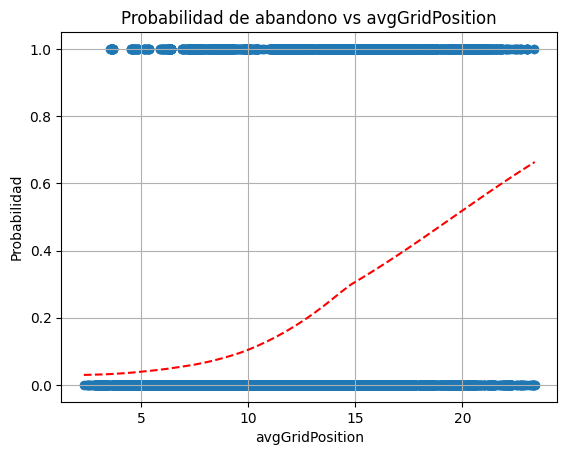

In [ ]:
# avgGridPosition
x1p = np.linspace(x1.min(), x1.max())
yp = model.predict(np.array([x1p, np.ones_like(x1p)*x3.mean(), np.ones_like(x1p)*x5.mean()]).T)

pyplot.scatter(x1, y)
pyplot.plot(x1p, yp, "r--")
pyplot.title("Probabilidad de abandono vs avgGridPosition")
pyplot.xlabel("avgGridPosition")
pyplot.ylabel("Probabilidad")
pyplot.grid(True)
pyplot.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


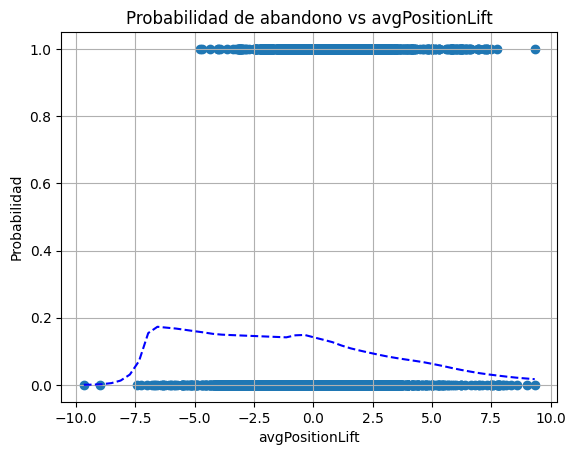

In [ ]:
# avgPositionLift
x3p = np.linspace(x3.min(), x3.max())
yp = model.predict(np.array([np.ones_like(x3p)*x1.mean(), x3p, np.ones_like(x3p)*x5.mean()]).T)

pyplot.scatter(x3, y)
pyplot.plot(x3p, yp, "b--")
pyplot.title("Probabilidad de abandono vs avgPositionLift")
pyplot.xlabel("avgPositionLift")
pyplot.ylabel("Probabilidad")
pyplot.grid(True)
pyplot.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


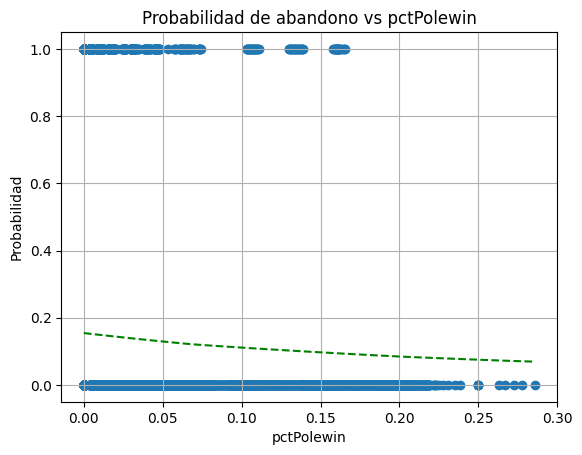

In [ ]:
# pctPolewin
x5p = np.linspace(x5.min(), x5.max())
yp = model.predict(np.array([np.ones_like(x5p)*x1.mean(), np.ones_like(x5p)*x3.mean(), x5p]).T)

pyplot.scatter(x5, y)
pyplot.plot(x5p, yp, "g--")
pyplot.title("Probabilidad de abandono vs pctPolewin")
pyplot.xlabel("pctPolewin")
pyplot.ylabel("Probabilidad")
pyplot.grid(True)
pyplot.show()

## Paso 6 — Predicciones simuladas

In [ ]:
model.predict(np.array([
    [18, 2.5, 0.05],
    [12, 3.0, 0.10],
    [20, 1.0, 0.00]
]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[0.32146943],
       [0.07374721],
       [0.610305  ]], dtype=float32)

**¿Qué gráfica no parece muy acorde?**

La de pctPolewin, ya que muchos pilotos podrían tener valores bajos o cero, haciendo difícil ver una relación clara en la gráfica.

**¿A partir de qué nivel de avgPositionLift es casi improbable que haya abandono?**

Cuando avgPositionLift supera las 2.5 posiciones ganadas por carrera, la probabilidad de abandono baja considerablemente (como mostró la predicción de 7%).

**¿Cuál es la predicción más alta de abandono para una persona con bajo desempeño?**

Un piloto con características como [20, 1.0, 0.00] tiene una probabilidad de abandono del 61%, según las predicciones del modelo.

## Conclusiones
Este proyecto final demostró que las redes neuronales son herramientas potentes y versátiles para resolver problemas de clasificación binaria en contextos reales, como la predicción de abandono en deportes de alto rendimiento.

A través de este proyecto, logre:

- Construir modelos neuronales completos y simplificados aplicando correctamente funciones de activación y pérdida.

- Identificar variables clave del rendimiento que impactan en el abandono de pilotos.

- Entrenar redes con eficiencia y evaluar su precisión de forma cuantitativa.

- Visualizar y comprender cómo afectan las variables de entrada la salida del modelo.

- Simular casos reales y analizar su probabilidad de abandono.

Además, observe que un modelo simplificado puede mantener una precisión aceptable con menos variables, lo cual es útil cuando se busca eficiencia sin perder interpretabilidad. Las gráficas nos permitieron validar visualmente el comportamiento del modelo y reforzar la comprensión del fenómeno analizado.

Gracias al contenido del curso, pude aplicar técnicas avanzadas con claridad y rigor, replicando un flujo de trabajo profesional de ciencia de datos. Este tipo de conocimiento tiene aplicaciones en muchos otros ámbitos como marketing, salud, educación o recursos humanos, lo que resalta el valor práctico y transversal de las redes neuronales.